# CHƯƠNG 3: HỌC CÓ GIÁM SÁT (SUPERVISED LEARNING) - PHẦN 03
---
Một thuật toán học máy được gọi là học có giám sát (supervised learning) nếu việc xây dựng mô hình dự đoán mối quan hệ giữa đầu vào và đầu ra được thực hiện dựa trên các cặp (đầu vào - input, đầu ra - label) đã biết trong tập huấn luyện. Đây là nhóm thuật toán phổ biến nhất trong các thuật toán machine learning.

Tập dữ liệu học (Training data) bao gồm các quan sát (Examples, Observations), mà mỗi quan sát được gắn kèm với một giá trị đầu ra mong muốn (Label)
<img src='pic/label.png' width='600px'>

Học có giám sát bao gồm 2 loại:
* Phân loại (Classification): Nếu nhãn (y – Target) thuộc tập rời rạc và hữu hạn
* Hồi quy (Regression): Nếu nhãn (y – Target) là biến liên tục (các số thực) ví dụ như dự báo nhiệt độ, giá nhà, mức tiêu thụ điện năng…

<img src='pic/type.png' width='400px' heith='300px'>

# B| Hồi quy (Regression)

## I) THUẬT TOÁN HỒI QUY TUYẾN TÍNH (Linear Regression)
---
<img src='pic/linear.png' width='400px'>




## VÍ DỤ THỰC HÀNH 1:
## DỰ ĐOÁN GIÁ NHÀ
---
Tập dữ liệu bao gồm 506 mẫu về các thông số của một căn hộ và giá bán căn hộ đó. Các thông số bao gồm:

1. CRIM: Tỷ lệ tội phạm bình quân đầu người trong thị trấn.
2. ZN: Tỷ lệ đất quy hoạch cho các khu vực trện 20.000 feet vuông.
3. INDUS: Tỷ lệ diện tích kinh doanh phi bán lẻ trên mỗi thị trấn
4. CHAS: Căn hộ có gần sông không (1-Gần sông | 0 - Không gần sông)
5. NOX: Nồng độ Oxit Nitric trong khu vực 
6. RM: Số phòng trung bình của mỗi ngôi nhà.
7. AGE: Tỷ lệ các căn hộ có chủ sở hữu được xây dựng trước năm 1940
8. DIS: Khoảng cách có trọng số tới 5 trung tâm việc làm Boston
9. RAD: Chỉ số khả năng tiếp cận các đường cao tốc hướng tâm.
10. TAX: Thuế xuất bất động sản (/$10.000)
11. PTRATIO: Tỷ lệ học sinh - Giáo viên của thị trấn
12. B: Tỷ lệ người da màu trong thị trấn.
13. LSTAT: Phần trăm dân số có mức thấp hơn mức trung bình

--------------------------------------
Target: MEDV: Giá trị trung bình của ngồi nhà (x$1000)

<img src='pic/pricehouse.png' width='400px'>

### Đọc dữ liệu mẫu từ Dataset của Sklearn vào 2 biến
* X_boston: chứa các feature đầu vào (input)
* y_boston: chứa label đầu ra (target)

In [ ]:
#import sklearn.datasets as datask
#boston_dataset = datask.load_boston()

In [ ]:
#boston = pd.DataFrame(boston_dataset.data, 
#                      columns=boston_dataset.feature_names)
#boston.head()

In [2]:
#Đọc tập dữ liệu Iris Dataset
import sklearn.datasets as datask
#Đọc dữ liệu trả về biến array
X_boston, y_boston = datask.load_boston(return_X_y=True)

print(type(X_boston))
print('Kích thước dữ liệu đầu vào (features):', X_boston.shape)
print('Kích thước dữ liệu đầu ra (target)   :', y_boston.shape)


<class 'numpy.ndarray'>
Kích thước dữ liệu đầu vào (features): (506, 13)
Kích thước dữ liệu đầu ra (target)   : (506,)


In [3]:
import pandas as pd
x_features = pd.DataFrame(X_boston,
                        columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
x_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#Các đặc trưng thống kê của các features đầu vào:
x_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
#Quan sát các đặc trưng thống kê của Giá nhà tại Boston: Target
import pandas as pd
y_prices = pd.DataFrame(y_boston,columns=['MEDV'])
y_prices.describe()

,MEDV
count,506.000000
mean,22.532806
std,9.197104
min,5.000000
25%,17.025000
50%,21.200000
75%,25.000000
max,50.000000


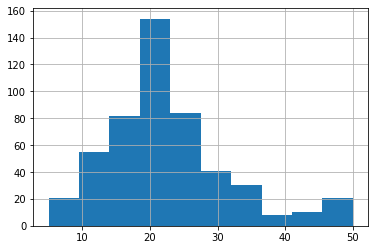

In [6]:
import matplotlib.pyplot as plt
plt.hist(y_boston)
plt.grid(True)

In [7]:
#%matplotlib inline
#sns.set(rc={'figure.figsize':(10,5)})
#sns.distplot(y_boston, bins=30)
#plt.show()

In [8]:
#Ghép các thuộc tính input và label vào 1 dataframe
boston_house = pd.concat([x_features,y_prices],axis=1)
boston_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
boston_house.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


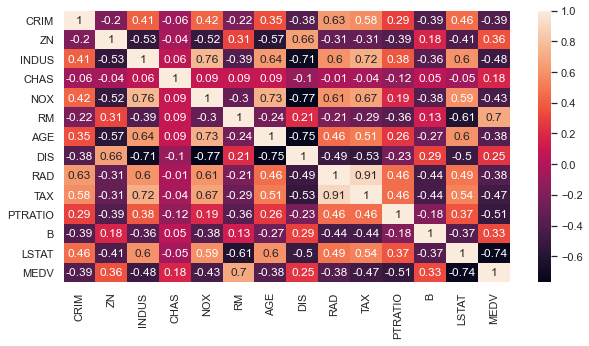

In [10]:
import seaborn as sns 
%matplotlib inline
correlation_matrix = boston_house.corr().round(2)
# annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(data=correlation_matrix, annot=True)

**Trong 13 thuộc tính ảnh hưởng tới giá của một căn nhà 2 thuộc tính có mối tương quan cao nhất là:**
    * RM (0.7): Số phòng trung bình của một căn nhà - Tương quan thuận
    * LSTAT (-0.74): Phần trăm dân số có mức thấp hơn mức trung bình - Tương quan nghịch

Text(0, 0.5, 'MEDV')

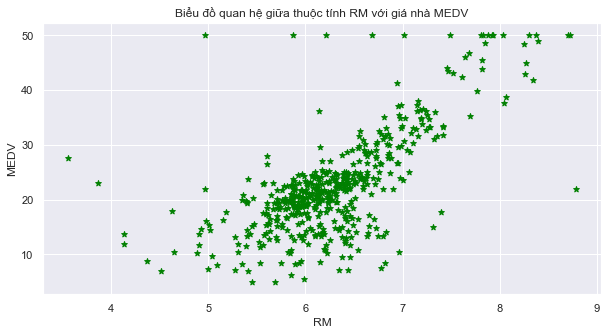

In [11]:
#Trực quan hóa mối quan hệ giữa giá nhà với số phòng
plt.scatter(boston_house['RM'],boston_house['MEDV'],marker='*', color='green')
plt.title('Biểu đồ quan hệ giữa thuộc tính RM với giá nhà MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

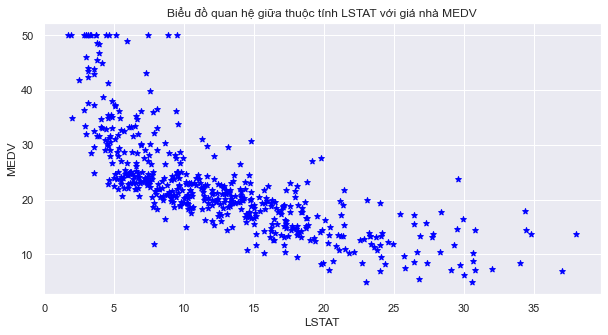

In [12]:
#Trực quan hóa mối quan hệ giữa giá nhà với phần trăm dân số dưới mức trung bình
plt.scatter(boston_house['LSTAT'],boston_house['MEDV'],marker='*', color='Blue')
plt.title('Biểu đồ quan hệ giữa thuộc tính LSTAT với giá nhà MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

## 1. Hồi quy tuyến tính đơn giản ( 1 biến độc lập)

<img src='pic/linear.png' width='400px'>

**Hàm số:**
$$y=\beta_0+\beta_1 x$$


- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1$: tham số của mô hình


### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

In [13]:
data_simple_linear = boston_house[['RM','MEDV']]
data_simple_linear.head(20)

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1
8,5.631,16.5
9,6.004,18.9


In [14]:
#Tách các biến độc lập để xây dựng mô hình hồi quy
X_rm = boston_house['RM'].values
X_lstat = boston_house['LSTAT'].values


y_prices = boston_house['MEDV'].values
print('Tỷ lệ số phòng:', X_rm[:10])
print('Giá phòng     :', y_prices[:10])
print('----------------------------------------------------')
print('Tỷ lệ % dưới mức trung bình:', X_lstat[:10])
print('Giá phòng                  :', y_prices[:10])

Tỷ lệ số phòng: [6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004]
Giá phòng     : [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]
----------------------------------------------------
Tỷ lệ % dưới mức trung bình: [ 4.98  9.14  4.03  2.94  5.33  5.21 12.43 19.15 29.93 17.1 ]
Giá phòng                  : [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


### 1.A) Sử dụng một biến độc lập RM dự đoán giá nhà
---

### Tách tập dữ liệu ra làm 2 phần dùng để huấn luyện và kiểm thử mô hình theo tỷ lệ (80% - 20%)
---

In [15]:
#Sử dụng thuộc tính RM
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rm, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


### Khai báo sử dụng mô hình hồi quy tuyến tính và huấn luyện model với dữ liệu Huấn luyện
---

In [16]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression(fit_intercept=False)
lin_model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [17]:
#Lấy các hệ số 
b1 = lin_model.coef_
b1

array([[3.65279843]])

In [18]:
#Lấy bias
b0 = lin_model.intercept_
b0

0.0

### Phương trình đường thẳng xác định được:
Y^ = f(x) = b0 + b1*X = 0 + 3.65279843*X

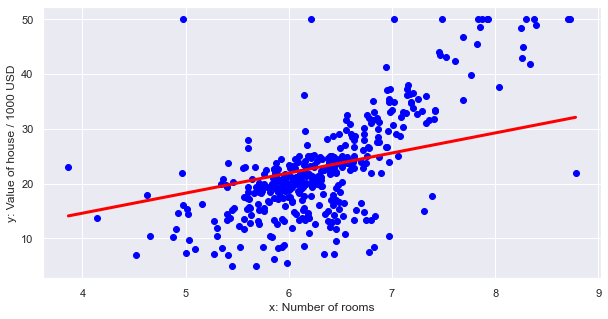

In [19]:
#Trực quan hóa đường hồi quy tuyến tính
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,lin_model.predict(xx),color="red",linewidth=3)
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [20]:
#Check thử

b1 = lin_model.coef_
b0 = lin_model.intercept_

x = X_test[0]
print('Số phòng TB: ', x)
y = b0 + b1*x
print('Giá nhà tương ứng: ', y)

Số phòng TB:  3.561
Giá nhà tương ứng:  [[13.0076152]]


In [21]:
X_test = X_test.reshape(-1, 1)
#y_test = y_test.reshape(-1, 1)

y_pred =lin_model.predict(X_test)
y_pred.reshape(1,-1)

array([[13.0076152 , 22.88843495, 23.29024278, 22.15787526, 23.07107487,
        21.46019076, 21.49306595, 22.73136462, 20.2218921 , 22.5341135 ,
        21.23371726, 24.3933879 , 23.16239483, 26.57045576, 22.32590399,
        22.65465585, 21.85469299, 24.07194164, 21.93140176, 21.94966575,
        21.8473874 , 29.47443051, 22.82999017, 23.41809072, 21.47114916,
        23.01628289, 21.383482  , 23.2244924 , 25.59515858, 23.05646368,
        22.36243198, 17.92062909, 24.41165189, 28.56488371, 21.21180047,
        25.01801643, 24.99244684, 22.38069597, 23.06742207, 28.49913333,
        27.92564398, 20.56890795, 21.47480196, 21.50767714, 15.95542353,
        22.26745922, 21.97158254, 26.54488618, 23.08203327, 21.77067863,
        23.91121851, 23.45461871, 20.79538145, 22.38069597, 22.84460137,
        21.94966575, 26.16499514, 24.57237502, 22.21997284, 23.39617393,
        22.67657264, 21.5989971 , 21.68301147, 22.42818235, 22.3112928 ,
        23.39617393, 21.63917789, 21.46019076, 25.4

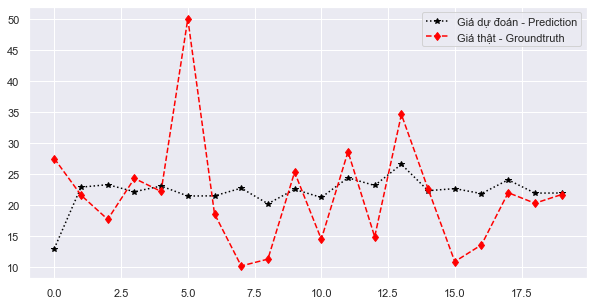

In [22]:
#Trực quan hóa kết quả
plt.plot(y_pred[:20], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[:20], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()

## Đánh giá độ chính xác của mô hình hồi quy
---
Trong các mô hình hồi quy, 
* RMSE - Sai số bình phương trung bình là một trong những đại lượng cơ bản và thường được sử dụng phổ biến cho việc đánh giá kết quả của mô hình dự báo số trị. Người ta thường hay sử dụng đại lượng sai số bình phương trung bình quân phương (RMSE) biểu thị độ lớn trung bình của sai số. Đặc biệt RMSE rất nhạy với những giá trị sai số lớn. Do đó nếu RMSE càng gần MAE sai số mô hình càng ổn định và có thể thực hiện việc hiệu chỉnh sản phẩm mô hình. Giống như MAE, RMSE không chỉ ra độ lệch giữa giá trị dự báo và giá trị thật. Giá trị của RMSE nằm trong khoảng (0,+ ∞) 
<img src = 'pic/RMSE.png' width='400px'>

* R2: Đánh giá tỷ lệ giải thích của mô hình ước lượng, hệ số này nằm giữa 0 và 1, càng gần 1 tỷ lệ giải thích được của mô hình càng tốt.

<img src='pic/MLR_r2.png' width='400px'>
<img src='pic/R2.jpg'>



In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('1.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

1.A) MÔ HÌNH HỒI QUY TUYẾN TÍNH SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 7.67452585343132
Sai số R2   0.3175498867662735


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 7.515249513351715
Sai số R2   0.2655113089618052


### 1.B) Sử dụng tất cả các biến độc lập để dự đoán giá nhà
---

### Hồi quy tuyến tính nhiều chiều (nhiều biến độc lập)

Hồi quy 2 biến: $y=\beta_0+\beta_1 x_2+\beta_2 x_2$

Hồi quy $m$ biến: $y=\beta_0+\beta_1x_1+\beta_2x_2+\dots+\beta_mx_m$

- $y$: biến phụ thuộc

- $x$: biến độc lập

- $\beta_0,\beta_1,\beta_2,\dots,\beta_m$: tham số của mô hình


<img src='pic/multi.png' width ='400px'>


### Xác định giá trị của tham số mô hình

- Xác định sai số ( hàm tổn thất) của mô hình.

- Chọn tham số để sai số nhỏ nhất.

## Mô hình lý thuyết

Giả sử rằng biến phụ thuộc $Y$ (output, dependent, response) có **quan hệ tuyến tính** 
với các biến đầu vào (independent, predictor) $X_1,X_2,\dots,X_m$ bởi công thức

$$ Y=\beta_0+\sum\limits_{j=1}^m \beta_j X_j+\varepsilon $$

trong đó $\varepsilon\sim N(0,\sigma^2)$ biến sai số không quan sát được (**error component**)


## Mục tiêu
Ước lượng các tham số $\beta_j$, phương sai $\sigma^2$, và sự ảnh hưởng các biến đầu vào đối với $Y$.

Giả sử ta có các $n$ quan sát $$(x_{i1},\dots,x_{im},y_i), i=1,2,\dots,n $$

$$y_i=\beta_0+\sum\limits_{j=1}^m \beta_j x_{ij}+e_i, i=1,2,\dots,n $$


với các $e_i$ là các sai số và cùng phân phối với $\varepsilon$

Ta sử dụng phương pháp **bình phương tối thiểu** ước lượng các $\beta_j$ sao cho sai số nhỏ nhất
$$SSE=\sum\limits_{i=1}^ne_i^2=\sum\limits_{i=1}^n (y_i-\beta_0-\sum\limits_{j=1}^m \beta_j x_{ij})^2 $$
$$\hat{\beta} =\arg\min SSE(\beta)$$

Tổng bình phương các sai số (SSE): $$SSE=\sum\limits_{i=1}^n \hat{e}_i^2=ESS(\hat{\beta}) $$
Hệ số $R^2$, $$ R^2=1-\dfrac{SSE}{SST}=1-\dfrac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{\sum\limits_{i=1}^n (y_i-\bar{y})^2}$$

### Tách tập dữ liệu theo tỷ lệ 80%:20% cho việc train và test
---

In [24]:
# Biến X_boston: Lưu trữ 13 biến độc lập (input)
# Biến y_boston: Lưu trữ biến phụ thuộc (target)

from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train, y_test = train_test_split(X_boston, 
                                                    y_boston, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [25]:
X_train_all[:2,:]

array([[  7.52601,   0.     ,  18.1    ,   0.     ,   0.713  ,   6.417  ,
         98.3    ,   2.185  ,  24.     , 666.     ,  20.2    , 304.21   ,
         19.31   ],
       [ 18.4982 ,   0.     ,  18.1    ,   0.     ,   0.668  ,   4.138  ,
        100.     ,   1.137  ,  24.     , 666.     ,  20.2    , 396.9    ,
         37.97   ]])

In [26]:
y_train[:2]

array([13. , 13.8])

In [27]:
#Sử dụng model hồi quy tuyến tính cho bài toán 
from sklearn.linear_model import LinearRegression
lin_model_all = LinearRegression(fit_intercept=True)
lin_model_all.fit(X_train_all, y_train)

LinearRegression()

### Xác định các hệ số của phương trình:
---

$$ ŷ_{MEDV} = f(x) = b_0 + b_1.X_{CRIM} + b_2.X_{ZN} + b_3.X_{INDUS} + b_4.X_{CHAS}+ b_5.X_{NOX} + b_6.X_{RM} + b_7.X_{AGE} + b_8.X_{DIS} + b_9.X_{RAD} + b_{10}.X_{TAX} + b_{11}.X_{PTRATIO} + b_{12}.X_B + b_{13}.X_{LSTAT} $$   

In [28]:
b0 = lin_model_all.intercept_
print('b0 =',b0)
dem=1
for i in lin_model_all.coef_:
    x = 'b'+str(dem)
    print(x,'=',i)
    dem=dem+1

b0 = 38.31611716641419
b1 = -0.1046837338943943
b2 = 0.039417367898359736
b3 = 0.059749799183773475
b4 = 0.8491895491272196
b5 = -21.141720495456156
b6 = 4.189352099173084
b7 = 0.006157298677705538
b8 = -1.4533734786472168
b9 = 0.2976091917931894
b10 = -0.013619416078839569
b11 = -1.091178798491509
b12 = 0.007843525254144171
b13 = -0.4770036182225048


In [29]:
#Các hệ số ứng với từng biến độc lập:
coeff_df = pd.DataFrame(lin_model_all.coef_, x_features.columns, columns =['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.104684
ZN,0.039417
INDUS,0.059750
CHAS,0.849190
NOX,-21.141720
RM,4.189352
AGE,0.006157
DIS,-1.453373
RAD,0.297609
TAX,-0.013619


In [30]:
b0 = lin_model_all.intercept_
print('b0 =',b0)

b0 = 38.31611716641419


In [31]:
#Sử dụng model huẩn luyện được trên tập Train để dự đoán trên tập Test
y_pred_all = lin_model_all.predict(X_test_all)
print(y_pred_all)

[12.27194543 25.68626233 19.57395825 29.69673515 21.78378986 23.30416025
 16.26897462 16.74213681 13.03381182 25.23581608 14.0476147  29.31851007
 17.28001499 35.38563597 18.18304391 14.11102404 14.06010762 29.34424892
 23.38359092 25.28493404 24.73839718 36.56003645 31.54492657 19.19496009
 20.94366145 16.80319423 11.34565665 24.62814474 31.07336327 23.42393708
 20.95032917  6.13217912 30.12943717 35.55906551 21.32917047 32.76649066
 35.44119999 20.70070033 29.3019616  39.77573541 39.35077931 12.96741265
 21.64142271 25.32155452  2.92589811 14.26983134 22.44231732 34.14540761
 27.46119658 21.31079073 30.71096005 25.61643089 15.22808618 19.30353306
 25.31739831 22.27278961 32.91253104 24.51036663 19.3949359  19.02236518
 15.81321664 21.10472439 15.37221298 23.69304058 19.91995469 20.16042028
 15.76485617 23.60658014 25.31400733 19.81407841 30.07149248  7.33643835
 18.66772187 20.82051958 20.67521317 20.10022011 13.62086705 10.15842803
 17.87799545 21.02207413 20.18278269 23.50872475 22

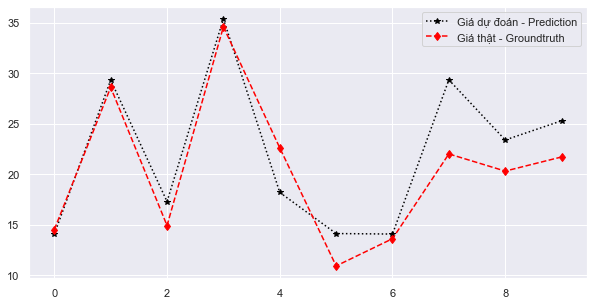

In [32]:
#Trực quan hóa kết quả dự đoán với kết quả groudtruth
plt.plot(y_pred_all[10:20], marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test[10:20], marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.legend()

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = lin_model_all.predict(X_train_all)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('1.B) MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC BIẾN ĐỘC LẬP')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model_all.predict(X_test_all)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

1.B) MÔ HÌNH HỒI QUY TUYẾN TÍNH VỚI TẤT CẢ CÁC BIẾN ĐỘC LẬP
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 4.614331990503534
Sai số R2   0.7532907239752


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 5.1327904071092965
Sai số R2   0.6573857941343244


In [34]:
# Hệ số R^2
lin_model_all.score(X_train_all,y_train)

0.7532907239752

## THỰC HÀNH 3
---
### Yêu cầu 1: 
Sinh viên tìm hiểu về tập dữ liệu mẫu Diabetes Dataset của Sklearn (xác định các features đầu vào (input) và label đầu ra (target))


In [ ]:
#{Sinh viên viết code ở đây!}



**Yêu cầu 2:**
---
* Trong tập dữ liệu Diabetes xác định thuộc tính có ảnh hưởng lớn nhất (hệ số tương quan cao nhất) tới thuộc tính target.
* Tách tập dữ liệu thành 2 phần Train – Test với tỷ lệ 75%-25%

In [ ]:
#{Sinh viên viết code ở đây!}





### Yêu cầu 3:
---
* 1) Xây dựng mô hình hồi quy tuyến tính đơn giản (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
* 2) Xây dựng mô hình hồi quy tuyến tính với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.


In [ ]:
#{Sinh viên viết code ở đây!}




## II) THUẬT TOÁN KNN CHO BÀI TOÁN HỒI QUY (KNN Regression)
---
* Tương tự như đối với bài toán phân lớp. Xác định những điểm dữ liệu gần nhất với điểm dữ liệu mới!
* Nhãn của điểm dữ liệu mới được là nhãn của điểm dữ liệu đã biết gần nhất (K=1) hoặc trung bình có trọng số của những điểm gần nhất.
<img src='pic/knn_regression.png' width='600px'>

Cho tập huấn luyện $(x_i,y_i)$. Dự báo giá trị tại mẫu $x$.

- Tìm $k$ lân cận gần nhất với $x$ từ mẫu $x_i$ của tập huấn luyện 

- Ký hiệu $N(x)=\{x_{i_1},\dots,x_{i_k}\}$ là tập mẫu tìm được

- Giá trị dự báo của $x$ là $y=f(x)=Average(y_i: x_i\in N(x))$

## Ví dụ: Dự đoán giá nhà với thuật toán KNN
---
### A) Sử dụng một biến độc lập RM để dự đoán giá nhà

Text(0, 0.5, 'MEDV')

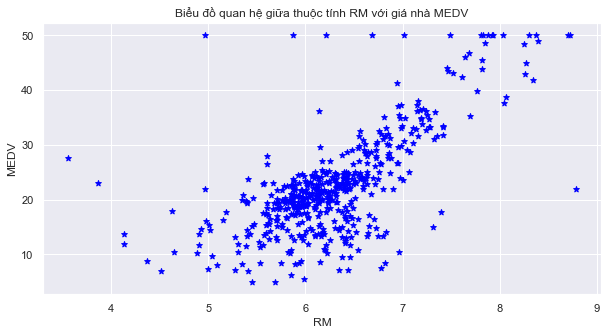

In [35]:
import matplotlib.pyplot as plt
#Trực quan hóa mối quan hệ giữa giá nhà với số phòng trung bình
plt.scatter(boston_house['RM'],boston_house['MEDV'],marker='*', color='Blue')
plt.title('Biểu đồ quan hệ giữa thuộc tính RM với giá nhà MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

In [36]:
#Lấy dữ liệu input và target.
X_rm = boston_house['RM'].values
y_prices =  boston_house['MEDV'].values
print(X_rm.shape)

(506,)


In [37]:
#tách tỷ lệ Train - Test
#Sử dụng thuộc tính RM để dự đoán
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rm, 
                                                    y_prices, 
                                                    test_size=0.2, 
                                                    random_state=50)
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [38]:
#Khai báo sử dụng thuật toán hồi quy KNN
from sklearn.neighbors import KNeighborsRegressor

#Trường hợp với n = 1
knn_reg = KNeighborsRegressor(n_neighbors=5)

#Huấn luyện model
knn_reg.fit(X_train,y_train)
print(knn_reg)

KNeighborsRegressor()


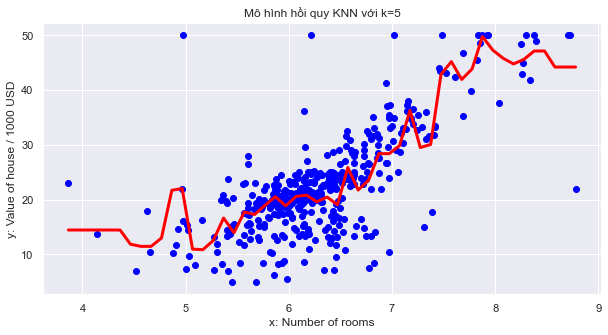

In [39]:
import numpy as np
xx=np.linspace(min(X_train),max(X_train)).reshape(-1,1)
plt.scatter(X_train,y_train,color="blue")
plt.plot(xx,knn_reg.predict(xx),color="red",linewidth=3)
plt.title('Mô hình hồi quy KNN với k=5')
plt.ylabel("y: Value of house / 1000 USD")
plt.xlabel("x: Number of rooms")
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg.predict(X_train)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('A) MÔ HÌNH HỒI QUY KNN SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg.predict(X_test)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

A) MÔ HÌNH HỒI QUY KNN SỬ DỤNG 1 BIẾN ĐỘC LẬP-RM
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 5.166827358301712
Sai số R2   0.6906745137827078


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 6.498274280718765
Sai số R2   0.4508457090315743


### B) Sử dụng tất cả các biến để dự đoán giá nhà
---

In [41]:
# Biến X_boston: Lưu trữ 13 biến độc lập (input)
# Biến y_boston: Lưu trữ biến phụ thuộc (target)
# Tách tập dữ liệu theo tỷ lệ 80%- 20%

from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train, y_test = train_test_split(X_boston, 
                                                    y_boston, 
                                                    test_size=0.2, 
                                                    random_state=50)
print("1. Kích thước tập Training: %d" %len(y_train))
print("2. Kích thước tập Test    : %d" %len(y_test))

1. Kích thước tập Training: 404
2. Kích thước tập Test    : 102


In [42]:
#Sử dụng thuật toán hồi quy KNN với k=3
knn_reg_all = KNeighborsRegressor(n_neighbors = 3)

#Huấn luyện
knn_reg_all.fit(X_train_all,y_train)

KNeighborsRegressor(n_neighbors=3)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score
# model evaluation for training set
y_train_predict = knn_reg_all.predict(X_train_all)
y_train_predict = y_train_predict.reshape(-1,1)

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print('B) MÔ HÌNH HỒI QUY KNN SỬ DỤNG TẤT CẢ BIẾN ĐỘC LẬP:')
print("Độ chính xác của mô hình trên tập huấn luyện:")
print("--------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = knn_reg_all.predict(X_test_all)
y_test_predict = y_test_predict.reshape(-1,1)

y_test = y_test.reshape(-1,1)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Độ chính xác của mô hình trên tập kiểm thử:")
print("-------------------------------------------")
print('Sai số RMSE {}'.format(rmse))
print('Sai số R2   {}'.format(r2))

B) MÔ HÌNH HỒI QUY KNN SỬ DỤNG TẤT CẢ BIẾN ĐỘC LẬP:
Độ chính xác của mô hình trên tập huấn luyện:
--------------------------------------------
Sai số RMSE 4.212558493944801
Sai số R2   0.7943826810906418


Độ chính xác của mô hình trên tập kiểm thử:
-------------------------------------------
Sai số RMSE 6.48593920781003
Sai số R2   0.4529285478994626


## THỰC HÀNH 3.4
---
Yêu cầu 1, 2 giống với bài thực hành 3.3

Yêu cầu 3:
1. Xây dựng mô hình KNN cho bài toán hồi quy (Simple Linear Regression) với thuộc tính có ảnh hưởng cao nhất tới thuộc tính Target. Xác định sai số RMSE và R2 trên tập Train và Test.
2. Xây dựng mô hình KNN cho bài toán hồi quy với tất các thuộc tính đầu vào (input). Xác định sai số RMSE và R2  trên tập Train và Test.

In [ ]:
#{Sinh viên viết code ở đây}


